In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

In [2]:
! pip install autopep8

In [ ]:
! pip install opencv-python

## Prerequisites

For this tutorial I reccomend you create new conda anvironment
```bash
conda create -n fast2 python=3.8.2 jupyter
```

## Install FastAI V2

In [ ]:
! pip install -U fastai2

## Import fastAI v2 vision modules

In [3]:
from fastai2.vision.all import *

## Semantic segmentation with UNet model

Recall the UNet model:
<img src="images/od/unet.png" height="800" width="800">

Download the dataset.
#### Note Here I'll download the "tiny" version, but you should switch it with 
```python
untar_data(URLs.CAMVID)
```

In [4]:
path = untar_data(URLs.CAMVID_TINY)

Let's look into the data

In [5]:
path.ls()

(#4) [Path('/Users/levan/.fastai/data/camvid_tiny/images'),Path('/Users/levan/.fastai/data/camvid_tiny/labels'),Path('/Users/levan/.fastai/data/camvid_tiny/codes.txt'),Path('/Users/levan/.fastai/data/camvid_tiny/models')]

In [6]:
(path / 'images').ls()

(#100) [Path('/Users/levan/.fastai/data/camvid_tiny/images/0006R0_f02550.png'),Path('/Users/levan/.fastai/data/camvid_tiny/images/0016E5_08137.png'),Path('/Users/levan/.fastai/data/camvid_tiny/images/0001TP_006840.png'),Path('/Users/levan/.fastai/data/camvid_tiny/images/0001TP_008070.png'),Path('/Users/levan/.fastai/data/camvid_tiny/images/0016E5_08057.png'),Path('/Users/levan/.fastai/data/camvid_tiny/images/0001TP_009150.png'),Path('/Users/levan/.fastai/data/camvid_tiny/images/Seq05VD_f03660.png'),Path('/Users/levan/.fastai/data/camvid_tiny/images/Seq05VD_f01260.png'),Path('/Users/levan/.fastai/data/camvid_tiny/images/0016E5_06090.png'),Path('/Users/levan/.fastai/data/camvid_tiny/images/0016E5_06870.png')...]

In [7]:
(path / 'labels').ls()

(#100) [Path('/Users/levan/.fastai/data/camvid_tiny/labels/Seq05VD_f02070_P.png'),Path('/Users/levan/.fastai/data/camvid_tiny/labels/0001TP_009000_P.png'),Path('/Users/levan/.fastai/data/camvid_tiny/labels/Seq05VD_f02640_P.png'),Path('/Users/levan/.fastai/data/camvid_tiny/labels/Seq05VD_f03150_P.png'),Path('/Users/levan/.fastai/data/camvid_tiny/labels/0006R0_f03630_P.png'),Path('/Users/levan/.fastai/data/camvid_tiny/labels/0006R0_f02550_P.png'),Path('/Users/levan/.fastai/data/camvid_tiny/labels/0006R0_f03240_P.png'),Path('/Users/levan/.fastai/data/camvid_tiny/labels/0001TP_009360_P.png'),Path('/Users/levan/.fastai/data/camvid_tiny/labels/Seq05VD_f01320_P.png'),Path('/Users/levan/.fastai/data/camvid_tiny/labels/0016E5_08400_P.png')...]

Load the class codes:

In [8]:
codes = np.loadtxt(path/'codes.txt', dtype=str)
codes

array(['Animal', 'Archway', 'Bicyclist', 'Bridge', 'Building', 'Car',
       'CartLuggagePram', 'Child', 'Column_Pole', 'Fence', 'LaneMkgsDriv',
       'LaneMkgsNonDriv', 'Misc_Text', 'MotorcycleScooter', 'OtherMoving',
       'ParkingBlock', 'Pedestrian', 'Road', 'RoadShoulder', 'Sidewalk',
       'SignSymbol', 'Sky', 'SUVPickupTruck', 'TrafficCone',
       'TrafficLight', 'Train', 'Tree', 'Truck_Bus', 'Tunnel',
       'VegetationMisc', 'Void', 'Wall'], dtype='<U17')

In [9]:
fnames = get_image_files(path/'images')
fnames[0]

Path('/Users/levan/.fastai/data/camvid_tiny/images/0006R0_f02550.png')

In [11]:
labels = get_image_files(path/'labels')
labels[0]

Path('/Users/levan/.fastai/data/camvid_tiny/labels/Seq05VD_f02070_P.png')

In [12]:
import cv2

In [14]:
lbl = cv2.imread(str(labels[0]), cv2.IMREAD_ANYCOLOR)

In [17]:
lbl.shape

(96, 128)

In [19]:
lbl[50:80, 100:120]

array([[ 8,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  8, 16, 16, 16,  4,
         4,  4,  4,  4],
       [ 8,  4,  4,  4,  4,  4,  4,  4, 15, 15,  4,  8, 16, 16,  4,  4,
         4,  4,  4,  4],
       [ 8,  4,  4,  4,  4,  4,  4,  4, 15, 15,  4,  8, 16, 16,  4,  4,
         4,  4,  4,  4],
       [ 8,  4,  4,  4,  4,  4,  4,  4, 15, 15,  4,  8, 16, 16,  4,  4,
         4,  4,  4,  4],
       [ 8,  4,  4,  4,  4,  4,  4,  4, 15, 15,  8,  8,  4, 16,  4,  4,
         4,  4,  4,  4],
       [ 8, 19, 19, 19, 19, 19, 19, 19, 15, 15,  4,  8,  4, 16,  4,  4,
         4,  4,  4,  4],
       [19, 19, 19, 19, 19, 19, 19, 19, 15, 15,  8, 16, 19, 16, 19, 19,
        19, 19, 19, 19],
       [17, 17, 17, 17, 17, 17, 17, 19, 19, 19, 19, 19, 19, 19, 19, 19,
        19, 19, 19, 19],
       [17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17,
        17, 17, 17, 17],
       [17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17,
        17, 17, 17, 17],
       [17, 17, 17, 17, 17, 17

In [20]:
?? get_image_files

In [25]:
fl = fnames[0]
fl, fl.stem, fl.suffix

(Path('/Users/levan/.fastai/data/camvid_tiny/images/0006R0_f02550.png'),
 '0006R0_f02550',
 '.png')

Initialize labels

In [26]:
def label_func(fn): 
    return path/'labels'/f'{fn.stem}_P{fn.suffix}'

Initialize the data loader

In [27]:
dls = SegmentationDataLoaders.from_label_func(path, bs=8, fnames=fnames, label_func=label_func, codes=codes, 
                                              seed=2020)

Look into the actual images

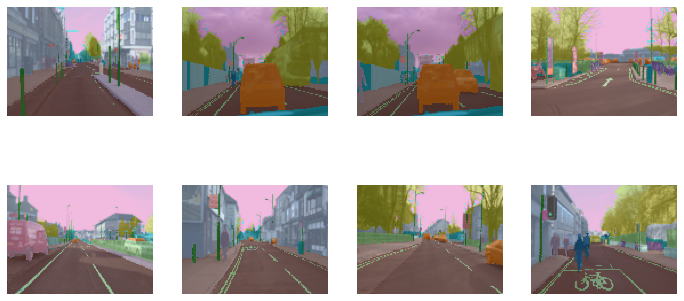

In [28]:
dls.show_batch(max_n=8)

## Initialize the model

In [29]:
learn = unet_learner(dls, resnet34)

Look in the model

In [30]:
learn.model

DynamicUnet(
  (layers): ModuleList(
    (0): Sequential(
      (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
      (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (4): Sequential(
        (0): BasicBlock(
          (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (relu): ReLU(inplace=True)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        )
        (1): BasicBlock(
          (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn1): BatchNorm2d(64, eps=1e-05

Recall pixel-suffle up-sumpling layer:
<img src="images/od/pixel_shuffle_1.jpg" height="1000" width="1000">

Where are the concatenations?
<br/>
For this FastAi library uses so called runtime hooks

In [ ]:
# A simple hook class that returns the input and output of a layer during forward/backward pass
class Hook():
    def __init__(self, module, backward=False):
        if not backward:
            self.hook = module.register_forward_hook(self.hook_fn)
        else:
            self.hook = module.register_backward_hook(self.hook_fn)
    def hook_fn(self, module, input, output):
        self.input = input
        self.output = output
    def close(self):
        self.hook.remove()

In [ ]:
print(learn.__dict__)

Check the optimizer

In [31]:
learn.opt_func

<function fastai2.optimizer.Adam(params, lr, mom=0.9, sqr_mom=0.99, eps=1e-05, wd=0.01, decouple_wd=True)>

Check the loss function:

In [32]:
learn.loss_func

FlattenedLoss of CrossEntropyLoss()

In [33]:
?? FlattenedLoss

Object ` FlattenedLoss` not found.


Check the type

In [34]:
type(learn.loss_func)

fastai2.layers.CrossEntropyLossFlat

In [38]:
?? CrossEntropyLossFlat

In [37]:
?? BaseLoss

Check the model performance:

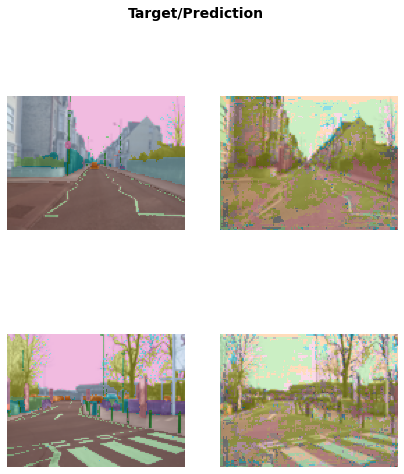

In [39]:
learn.show_results(max_n=6, figsize=(7, 8))

#### Fine-tune the model

In [ ]:
learn.fine_tune(8)

Check the results

In [ ]:
learn.show_results(max_n=6, figsize=(7, 8))

#### Save the model

In [ ]:
learn.save('unet_cv_ft', with_opt=True)

#### Copy and download the model weights

In [ ]:
(learn.path / learn.model_dir).ls()

In [ ]:
! cp  {learn.path / learn.model_dir / 'unet_cv_ft.pth'} /

In [ ]:
?? learn.save

#### Use data block API for image loading

In [ ]:
camvid = DataBlock(blocks=(ImageBlock, MaskBlock(codes)),
                   get_items = get_image_files,
                   get_y = label_func,
                   splitter=RandomSplitter(),
                   batch_tfms=aug_transforms(size=(120,160)))

In [ ]:
dls = camvid.dataloaders(path/"images", path=path, bs=8)

In [ ]:
dls.show_batch(max_n=8)

In [ ]:
?? get_image_files

In [ ]:
?? get_files

#### Get meta-data for model initialization

In [ ]:
dls.one_batch()[0].shape[-2:]

In [ ]:
get_c(dls)

## Find learning rate

In [ ]:
learn.lr_find()

fine-tuning means it will update all layers weights and biases with discriminative learning rate

In [ ]:
?? learn.fine_tune

#### Task: Try train with different size (progressive growing) and different augmentations

## Object detection with Detectron2 library

The library Detectron2 in Facebook's library on top of the PyTorch for fast object detection and semantic segmentation training

#### Install library

In [ ]:
! pip install -U cython pyyaml==5.1

In [ ]:
! pip install -U 'git+https://github.com/cocodataset/cocoapi.git#subdirectory=PythonAPI'

In [ ]:
! git clone https://github.com/facebookresearch/detectron2 detectron2_repo 
! pip install -e detectron2_repo

In [ ]:
! pip install -U watermark

In [ ]:
%watermark

In [ ]:
%reload_ext watermark %watermark -v -p numpy, pandas, pycocotools, torch, torchvision, detectron2

In [ ]:
! pip install seaborn

#### Prepare dataset

In [ ]:
! pip install kaggle

In [ ]:
from pathlib import Path

In [ ]:
Path.home()

In [ ]:
path = Path.home() /'.kaggle'
path.mkdir(exist_ok=True)

In [ ]:
import json
import zipfile
import os

In [ ]:
api_token = {"username":"levants","key":"your-key"}

json_path = path / 'kaggle.json'
with json_path.open(mode='w') as file:
    json.dump(api_token, file)

In [ ]:
json_path

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets list

In [ ]:
! kaggle competitions download -c global-wheat-detection

In [ ]:
datasets = Path('/content') / 'drive' / 'My\ Drive' / 'datasets'
! ls {datasets}

In [ ]:
wheet_path = datasets / 'global-wheat-detection.zip'
wheet_path

In [ ]:
! ls {data_path}

In [ ]:
content = Path('/content')
content.mkdir(exist_ok=True)
data_path = content / 'wheet'
data_path.mkdir(exist_ok=True)

In [ ]:
! cp {wheet_path} {data_path}

In [ ]:
zip_ref = zipfile.ZipFile(data_path / 'global-wheat-detection.zip', 'r')
zip_ref.extractall(path=data_path)
zip_ref.close()

## Organize imports for Detectron2 library

In [ ]:
import json
import logging
import os
import random

from pathlib import Path

import pandas as pd
import torch
from detectron2.config import get_cfg
from detectron2.data import (MetadataCatalog, DatasetCatalog)
from detectron2.engine import DefaultTrainer
from detectron2.structures import BoxMode
from detectron2.utils.logger import setup_logger
from sklearn.model_selection import train_test_split

from path_utils import root_path

## Convert dataset

In [ ]:
from detectron2.structures import BoxMode

In [ ]:
import pandas as pd

In [ ]:
images_path = data_path / 'train' 
csv_path = data_path / 'train.csv'

In [ ]:
df = pd.read_csv(csv_path)

In [ ]:
df

In [ ]:
class_names = df.source.unique().tolist()
classes = {class_name: idx for idx, class_name in enumerate(class_names)}
LABEL_NAMES = classes
LABEL_NAMES

In [ ]:
df.image_id.unique().shape

In [ ]:
import json

In [ ]:
def create_dataset(df):
    dataset_dicts = []
    for image_id, img_name in enumerate(df.image_id.unique()):
        record = {}
        image_df = df[df.image_id == img_name]
        file_path = str(images_path / f'{img_name}.jpg')
        record['file_name'] = file_path
        record['image_id'] = image_id
        record['height'] = int(image_df.iloc[0].height)
        record['width'] = int(image_df.iloc[0].width)
        objs = []
        for _, row in image_df.iterrows():
            bbox_raw = json.loads(row.bbox)
            bbox = [int(bbox_raw[0]), int(bbox_raw[1]),
                    int(bbox_raw[0] + bbox_raw[2]), int(bbox_raw[1] + bbox_raw[3])]
            obj = dict(bbox=bbox,
                       bbox_mode=BoxMode.XYXY_ABS,
                       segmentation=[],
                       category_id=classes.get(row.source, 0),
                       iscrowd=0)
            objs.append(obj)
        record['annotations'] = objs
        dataset_dicts.append(record)

    return dataset_dicts

In [ ]:
dataset = create_dataset(df)

In [ ]:
import pickle

In [ ]:
pickle_path = data_path / 'dataset.pkl'

In [ ]:
with pickle_path.open(mode='wb') as fp:
    pickle.dump(dataset, fp)

In [ ]:
with pickle_path.open(mode='rb') as fp:
    dataset = pickle.load(fp)

Data is ordered

In [ ]:
dataset[1000: 1200]

let's shuffle dataset and then split it to training and test / validation parts

In [ ]:
import random

In [ ]:
random.shuffle(dataset)

In [ ]:
dataset[1000: 1200]

In [ ]:
len(dataset)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train_dt, test_dt = train_test_split(dataset, test_size=0.2, random_state=2020, stratify=None)

In [ ]:
len(train_dt), len(test_dt)

#### Register datasets in detectron format

In [ ]:
from detectron2.data import (MetadataCatalog, DatasetCatalog)

In [ ]:
TRAIN_VAL = ['train', 'val']

In [ ]:
def _register_if_not(dataset_name: str, data_func: callable):
    """
    Register data if it is not already registered
    Args:
        dataset_name: data-set name
        data_func: data initialization function

    Returns:
        data catalog with registered dataset
    """
    if dataset_name in DatasetCatalog.list():
        print(f'Data-set {dataset_name} is already registered')
    else:
        DatasetCatalog.register(dataset_name, data_func)
        MetadataCatalog.get(dataset_name).set(thing_classes=class_names)
        print(f'Registration of the data-set {dataset_name} is done with labels {class_names}')

    return DatasetCatalog

In [ ]:
def register_data_types(name: str, train_dicts: list, test_dicts: list) -> dict:
    """
    Register data types for training
    Args:
        name: name of data
        train_dicts: training data
        test_dicts: validation / test data

    Returns:
        data_catalogs: registered data catalogs
    """
    data_catalogs = dict()
    for d in TRAIN_VAL:
        data_catalog = _register_if_not(f'{name}_{d}', lambda: train_dicts if d == 'train' else test_dicts)
        data_catalogs[d] = data_catalog

    return data_catalogs

In [ ]:
register_data_types('wheets', train_dt, test_dt)

#### Train the Faster-RCNN on our custom dataset

In [ ]:
cfg_path = Path('configs') / 'faster_rcnn_X_101_32x8d_FPN_3x.yaml'

In [ ]:
outputs_path = Path('output')
outputs_path.mkdir(exist_ok=True)

#### Set device

In [ ]:
import torch

from detectron2.config import CfgNode
from detectron2.engine import DefaultTrainer
from detectron2.engine import launch
from detectron2.utils.logger import setup_logger

In [ ]:
import logging
logging.basicConfig(level='DEBUG')

In [ ]:
if torch.cuda.is_available():
    torch.cuda.set_device(0)

In [ ]:
setup_logger()

#### Download pre-trained weights

In [ ]:
R_RX_101: str = 'https://dl.fbaipublicfiles.com/detectron2/' \
                'COCO-Detection/faster_rcnn_X_101_32x8d_FPN_3x/139173657/model_final_68b088.pkl'

In [ ]:
weighs_dir = Path('weights')
weighs_dir.mkdir(exist_ok=True)

In [ ]:
! wget {R_RX_101} -P {weighs_dir}

In [ ]:
weights_path = weighs_dir / 'model_final_68b088.pkl'

#### Configure model and dataset

In [ ]:
from detectron2.config import get_cfg

In [ ]:
cfg = get_cfg()
# Initialize model architecture
cfg.merge_from_file(str(cfg_path))
# Thresholds
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.05
# Configure model device bindings
cfg.MODEL.DEVICE = 'cuda' if torch.cuda.is_available() else 'cpu'
# Number of prediction
cfg.MODEL.ROI_HEADS.NUM_CLASSES = len(LABEL_NAMES)
# Set weights
cfg.MODEL.WEIGHTS = str(weights_path)

In [ ]:
cfg.DATASETS.TRAIN = ('wheets_train',)
cfg.DATASETS.TEST = ()
cfg.DATALOADER.NUM_WORKERS = 4
cfg.SOLVER.IMS_PER_BATCH = 4
cfg.DATALOADER.NUM_WORKERS_PB = 2
cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 128
cfg.MODEL.NUM_GPUS = 1
# Learning rate configuration
cfg.SOLVER.BASE_LR = 0.001
cfg.SOLVER.WARMUP_ITERS = 1000
cfg.SOLVER.MAX_ITER = 5000
cfg.SOLVER.STEPS = (1000, 1500)
cfg.SOLVER.GAMMA = 0.05
cfg.SOLVER.CHECKPOINT_PERIOD = 500
# Test configuration`
cfg.TEST.EVAL_PERIOD = 500
# Output directory
cfg.OUTPUT_DIR = str(outputs_path)

In [ ]:
import os

In [ ]:
os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)

In [ ]:
trainer = DefaultTrainer(cfg)

In [ ]:
trainer.resume_or_load(resume=False)

In [ ]:
trainer.train()

#### Evaluate detection model

In [ ]:
from detectron2.config import (get_cfg, CfgNode)
from detectron2.data.catalog import Metadata
from detectron2.engine import DefaultPredictor
from detectron2.utils.visualizer import Visualizer, ColorMode

In [ ]:
cfg_eval = get_cfg()
# Initialize model architecture
cfg_eval.merge_from_file(str(cfg_path))
# Thresholds
cfg_eval.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.05
# Configure model device bindings
cfg_eval.MODEL.DEVICE = 'cuda' if torch.cuda.is_available() else 'cpu'
# Number of prediction
cfg_eval.MODEL.ROI_HEADS.NUM_CLASSES = len(LABEL_NAMES)
# Set weights
cfg_eval.MODEL.WEIGHTS = str(weights_path)

In [ ]:
predictor = DefaultPredictor(cfg_eval)

In [ ]:
class CustomPredictor(object):
    """Customized predictor"""

    def __init__(self, meta_data: Metadata, predictor: DefaultPredictor, scale: float = 1.0):
        self.meta_data = meta_data
        self.predictor = predictor
        self.scale = scale

    def forward(self, img: np.ndarray) -> tuple:
        """
        Run model and draw predicted bounding boxes
        Args:
            img: input image

        Returns:
            pred: predicted bounding boxes with labels
            pred_img: image with predicted bounding boxes
        """
        preds = self.predictor(img)
        pred_imgs = list()
        for pred in preds:
            vis_cl = Visualizer(img[:, :, ::-1], metadata=self.meta_data, scale=self.scale,
                                instance_mode=ColorMode.IMAGE)
            print(pred)
            vis = vis_cl.draw_instance_predictions(pred['instances'].to('cpu'))
            pred_img = vis.get_image()[:, :, ::-1]
            pred_imgs.append(pred_img)

        return preds, pred_imgs

    def __call__(self, *args, **kwargs):
        return self.forward(*args, **kwargs)

In [ ]:
test_metadata = MetadataCatalog.get('wheets_test')
test_metadata

In [ ]:
model = CustomPredictor(test_metadata, predictor)

In [ ]:
test_dir = Path('test_wheets')
test_dir.mkdir(exist_ok=True)

In [ ]:
test_files = [str(test_path) for test_path in test_dir.iterdir() if test_path.suffix in {'.jpg', '.jpeg', '.png'}]
test_files

In [ ]:
import cv2

In [ ]:
imgs = [(img_path, cv2.imread(str(img_path), cv2.IMREAD_ANYCOLOR)) for img_path in test_files]

In [ ]:
result_dir = Path('wheet_results')
result_dir.mkdir(exist_ok=True)

In [ ]:
for idx, (img_pt, cv_img) in enumerate(imgs):
    prds, res_imgs = model(cv_img)
    cv2.imwrite(str(result_dir / img_pt.name), res_imgs[0])
    

## Questions?